## GDP and life expectancy
Richer countries can afford to invest more on healthcare, on work and road safety, and other measures that reduce mortality. On the other hand, richer countries may have less healthy lifestyles. Is there any relation between the wealth of a country and the life expectancy of its inhabitants?

The following analysis checks whether there is any correlation between the total gross domestic product (GDP) of a country in 2015 and the life expectancy of people born in that country in 2015.

### Getting the data
Two datasets of the World Bank are considered. One dataset, available at http://data.worldbank.org/indicator/NY.GDP.MKTP.CD, lists the GDP of the world's countries in current US dollars, for various years. The use of a common currency allows us to compare GDP values across countries. The other dataset, available at http://data.worldbank.org/indicator/SP.DYN.LE00.IN, lists the life expectancy of the world's countries. The datasets were downloaded as CSV files in June 2021.

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)


import pandas as pd

YEAR = 2015


gdppc = pd.read_csv('GDP_per_capita_2015.csv')

health_exp = pd.read_csv('current_health_exp_2015.csv')

gdppc['GDP per capital']=gdppc['NY.GDP.PCAP.CD']
health_exp['Current health expenditure']=health_exp['SH.XPD.CHEX.GD.ZS']
health_exp
GDP_INDICATOR = 'GDP per capital'
HEALTH_INDICATOR = 'Current health expenditure'
gdppc.head()
gdppc.tail()




## Cleaning the data

Inspecting the data with `head()` and `tail()`of both the Gdp per capita and health expenditure shows that:

1. The rows contain so many rows that are aggregations of countries or not countries at all
2. The data contains some null values

1.The data is therefore cleaned by:
importing another csv file with a list of countries and comparing with our data and then merging keeping in mind the different index
2.droping all missing values

In [2]:
listCountry = pd.read_csv('list_of_countries.csv')
listCountry['Country Name'] = listCountry['value']
countrylist = listCountry['Country Name']
countrylist =pd.DataFrame(countrylist)
gdppc = pd.DataFrame(gdppc)

health_exp = pd.DataFrame(health_exp)

In [3]:
# Need to rename Rings since we are merging on it but we want
# it to show as different columns post-merge



In [4]:
gdppc = gdppc.rename({'Country Name': 'Country_new'}, axis=1)
gdppc_merge = gdppc.merge(countrylist, how='left', 
                    left_on=['Country_new'],
                    right_on=['Country Name'])
gdppc_merge.tail(30)


,Country_new,Year,NY.GDP.PCAP.CD,GDP per capital,Country Name
234,Latin America & the Caribbean (IDA & IBRD coun...,2015,8742.373000,8742.373000,NaN
235,Timor-Leste,2015,1332.782859,1332.782859,Timor-Leste
236,Middle East & North Africa (IDA & IBRD countries),2015,3964.475378,3964.475378,NaN
237,Tonga,2015,4336.196576,4336.196576,Tonga
238,South Asia (IDA & IBRD),2015,1541.803699,1541.803699,NaN
239,Sub-Saharan Africa (IDA & IBRD countries),2015,1669.496761,1669.496761,NaN
240,Trinidad and Tobago,2015,18289.704340,18289.704340,NaN
241,Tunisia,2015,3861.688531,3861.688531,Tunisia
242,Turkey,2015,11006.249740,11006.249740,Turkey
243,Tuvalu,2015,3197.772252,3197.772252,Tuvalu


In [5]:
health_exp = health_exp.rename({'Country Name': 'Country_new'}, axis=1)
health_exp_merge = health_exp.merge(countrylist, how='left', 
                    left_on=['Country_new'],
                    right_on=['Country Name'])
health_exp_merge.tail(30)

,Country_new,Year,SH.XPD.CHEX.GD.ZS,Current health expenditure,Country Name
234,Latin America & the Caribbean (IDA & IBRD coun...,2015,7.836609,7.836609,NaN
235,Timor-Leste,2015,3.953906,3.953906,Timor-Leste
236,Middle East & North Africa (IDA & IBRD countries),2015,6.116193,6.116193,NaN
237,Tonga,2015,4.576152,4.576152,Tonga
238,South Asia (IDA & IBRD),2015,3.508087,3.508087,NaN
239,Sub-Saharan Africa (IDA & IBRD countries),2015,5.139647,5.139647,NaN
240,Trinidad and Tobago,2015,6.039512,6.039512,NaN
241,Tunisia,2015,7.007412,7.007412,Tunisia
242,Turkey,2015,4.116904,4.116904,Turkey
243,Tuvalu,2015,16.699593,16.699593,Tuvalu


In [6]:
gdp_clean=gdppc_merge.dropna()
healthExp_clean=health_exp_merge.dropna()
gdp_clean
healthExp_clean

,Country_new,Year,SH.XPD.CHEX.GD.ZS,Current health expenditure,Country Name
1,Afghanistan,2015,10.105348,10.105348,Afghanistan
2,Angola,2015,2.605795,2.605795,Angola
3,Albania,2015,4.896322,4.896322,Albania
4,Andorra,2015,6.232453,6.232453,Andorra
6,United Arab Emirates,2015,3.583591,3.583591,United Arab Emirates
...,...,...,...,...,...
256,Vanuatu,2015,4.157737,4.157737,Vanuatu
258,Samoa,2015,5.674710,5.674710,Samoa
261,South Africa,2015,8.200903,8.200903,South Africa
262,Zambia,2015,4.435102,4.435102,Zambia


**All irrelevant colums are dropped in both data**

In [8]:
COUNTRY = 'Country Name'
headings = [COUNTRY, GDP_INDICATOR]
gdp_clean = gdp_clean[headings]
gdp_clean.head()


,Country Name,GDP per capital
0,Aruba,27980.880700
1,Afghanistan,578.466353
2,Angola,4166.979684
3,Albania,3952.801215
4,Andorra,35762.523070


In [9]:
COUNTRY = 'Country Name'
headings = [COUNTRY, HEALTH_INDICATOR]
healthExp_clean = healthExp_clean[headings]
healthExp_clean.head()

,Country Name,Current health expenditure
1,Afghanistan,10.105348
2,Angola,2.605795
3,Albania,4.896322
4,Andorra,6.232453
6,United Arab Emirates,3.583591


**The data is now merged and the column renamed to give better clarity**

In [10]:
gdpVsHealth = pd.merge(gdp_clean, healthExp_clean, on=COUNTRY, how='inner')
gdpVsHealth.head()

,Country Name,GDP per capital,Current health expenditure
0,Afghanistan,578.466353,10.105348
1,Angola,4166.979684,2.605795
2,Albania,3952.801215,4.896322
3,Andorra,35762.523070,6.232453
4,United Arab Emirates,38663.383810,3.583591


**Now it is time to test this relationship using correlation** *imported from scipy
Correlation is chosen because the variables here are continous *

In [11]:
from scipy.stats import spearmanr

gdpColumn = gdpVsHealth[GDP_INDICATOR]
healthColumn = gdpVsHealth[HEALTH_INDICATOR]
(correlation, pValue) = spearmanr(gdpColumn, healthColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is  statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.262337395992031
It is  statistically significant.


**THe correlation is poor since,0.2 is closer to 0 than 1 so,it's clear that some countries with high Gdp per capital still have low health expenditure and vice versa**

<AxesSubplot:xlabel='GDP per capital', ylabel='Current health expenditure'>

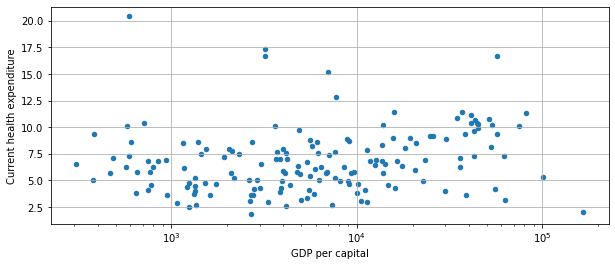

In [12]:
%matplotlib inline
gdpVsHealth.plot(x=GDP_INDICATOR, y=HEALTH_INDICATOR, kind='scatter', grid=True, logx=True, figsize=(10, 4))

In [13]:
# the 10 countries with lowest GDP per capital
gdpVsHealth.sort_values(GDP_INDICATOR).head(10)

,Country Name,GDP per capital,Current health expenditure
10,Burundi,305.549773,6.578576
24,Central African Republic,377.423002,5.034342
100,Malawi,380.597033,9.333338
89,Madagascar,467.235399,5.721168
103,Niger,484.238633,7.138037
139,Togo,570.910279,6.249382
0,Afghanistan,578.466353,10.105348
129,Sierra Leone,588.228453,20.413412
97,Mozambique,589.859028,7.239737
53,Guinea-Bissau,603.401118,8.591153


In [14]:
# the 10 countries with lowest health expenditure
gdpVsHealth.sort_values(HEALTH_INDICATOR).head(10)

,Country Name,GDP per capital,Current health expenditure
117,Papua New Guinea,2679.345589,1.818817
87,Monaco,166011.509100,2.028333
14,Bangladesh,1248.453398,2.463115
1,Angola,4166.979684,2.605795
48,Gabon,7384.715870,2.657439
112,Pakistan,1356.667756,2.687119
12,Benin,1076.797716,2.907415
54,Equatorial Guinea,11283.465610,2.915340
63,Indonesia,3331.695128,2.991135
73,Kazakhstan,10510.771890,3.040511


The plot shows there is no clear correlation: there are rich countries with low health expenditure, poor countries with high health expenditure, and countries with 1 to 10, thousand  dollars GDP have almost the full range of values, from 2.5 to over 17.5 health expenditure. Towards the lower and higher end of GDP, the variation diminishes. 

Comparing the 10 poorest countries and the 10 countries with the lowest health expenditure shows that  GDP per capita is a fair tool since 8 out of the countries with low GDP per capital have also low health expenditure.Howeveer countries with low health expenditure don't have low GDP per capital, this is a finding that can be further studied.